## Import Libraries

In [1]:
import os
import pandas as pd

import psycopg2

## Connect to the DB

In [2]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Read cohort

In [3]:
cohortQuery = """select * from sepsis_micro.cohort;"""
cohortDf = pd.read_sql_query(cohortQuery, con)
cohortDf

,micro_specimen_id,person_id,chart_time
0,6365708,-327798482,2120-12-02 08:30:00
1,9739471,-547630419,2122-01-20 21:50:00
2,1165358,53482570,2141-04-28 01:00:00
3,9769904,-1046091425,2137-10-15 20:50:00
4,1757513,697543230,2145-12-24 12:00:00
...,...,...,...
25779,9590030,-1745758358,2152-12-06 17:20:00
25780,1337571,-125994228,2202-02-22 17:00:00
25781,5635481,-1722273729,2182-01-17 11:45:00
25782,3230273,809235921,2153-02-25 19:20:00


In [5]:
cohortCountsQuery = """
    select
    count(distinct micro_specimen_id) as micro_specimen_count,
    count(distinct person_id) as person_count
    from
    sepsis_micro.cohort
"""
cohortCountsDf = pd.read_sql_query(cohortCountsQuery, con)
cohortCountsDf.iloc[0, ]

micro_specimen_count    25784
person_count            11329
Name: 0, dtype: int64

In [6]:
cohortCountsDf.iloc[0, ].index

Index(['micro_specimen_count', 'person_count'], dtype='object')

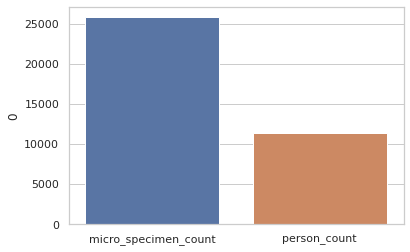

In [7]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=cohortCountsDf.iloc[0, ].index, y=cohortCountsDf.iloc[0, ])

## Static data

In [8]:
staticQuery = """select * from sepsis_micro.static;"""
staticDf = pd.read_sql_query(staticQuery, con)
staticDf

,micro_specimen_id,person_id,gender_source_value,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,age
0,9720605,-1912139691,F,Emergency Room - Hospital,142.0,DIRECT EMER.,PHYSICIAN REFERRAL,45.0
1,3976057,-1727642663,F,Emergency Room and Inpatient Visit,148.0,URGENT,TRANSFER FROM HOSPITAL,89.0
2,735457,-1229718441,M,Emergency Room and Inpatient Visit,163.0,URGENT,TRANSFER FROM HOSPITAL,67.0
3,5191616,728812306,F,Emergency Room and Inpatient Visit,268.0,URGENT,TRANSFER FROM HOSPITAL,80.0
4,3954993,-1654847942,M,Emergency Room and Inpatient Visit,358.0,URGENT,TRANSFER FROM HOSPITAL,55.0
...,...,...,...,...,...,...,...,...
24267,2649012,-954369712,F,Emergency Room - Hospital,27.0,EW EMER.,EMERGENCY ROOM,50.0
24268,5662604,-954369712,F,Emergency Room - Hospital,359.0,EW EMER.,EMERGENCY ROOM,47.0
24269,6122161,-954369712,F,Emergency Room - Hospital,170.0,EW EMER.,EMERGENCY ROOM,47.0
24270,6126875,-954369712,F,Emergency Room - Hospital,169.0,EW EMER.,EMERGENCY ROOM,48.0


### Visit duration

Text(0, 0.5, 'Count')

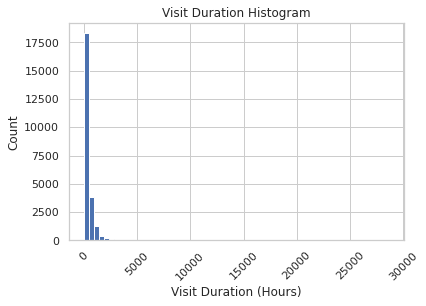

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(staticDf.visit_duration_hrs, bins=60)

ax.set_title('Visit Duration Histogram')
ax.set_xlabel('Visit Duration (Hours)')
ax.set_ylabel('Count')

### Visit distribution

Text(0.5, 0, 'Visit')

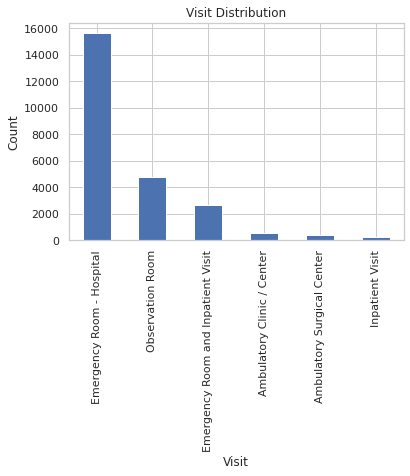

In [10]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_occurrence_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit')

### Visit source distribution

Text(0.5, 0, 'Visit Source')

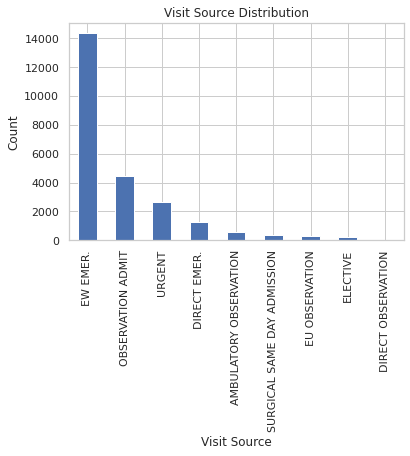

In [11]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_source_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit Source')

### Admitting source distribution

Text(0.5, 0, 'Admitting Source')

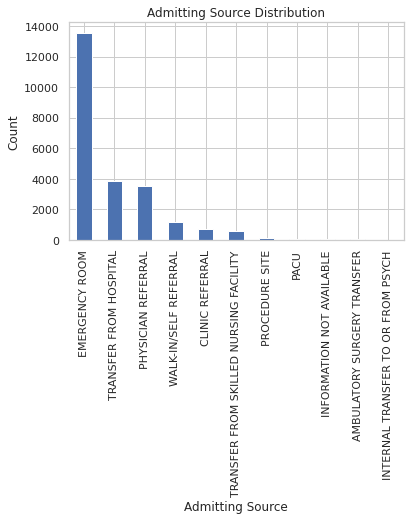

In [12]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.admitting_source_value.value_counts().plot(kind='bar')

ax.set_title('Admitting Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admitting Source')

## Vitals data

In [13]:
vitalsQuery = """select * from sepsis_micro.vitals;"""
vitalsDf = pd.read_sql_query(vitalsQuery, con)
vitalsDf

,micro_specimen_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,1247618,-2144679073,2194-04-08 23:00:00,°F,94.4,Body temperature,1
1,9734522,-2144679073,2194-04-08 23:00:00,°F,94.4,Body temperature,2
2,1247618,-2144679073,2194-04-09 01:00:00,°F,97.8,Body temperature,3
3,9734522,-2144679073,2194-04-09 01:00:00,°F,97.8,Body temperature,4
4,1247618,-2144679073,2194-04-09 04:00:00,°F,97.3,Body temperature,5
...,...,...,...,...,...,...,...
4205215,647143,2146343948,2161-04-07 08:01:00,mmHg,113.0,Systolic blood pressure by Noninvasive,8
4205216,647143,2146343948,2161-04-07 09:01:00,mmHg,129.0,Systolic blood pressure by Noninvasive,9
4205217,647143,2146343948,2161-04-07 10:01:00,mmHg,105.0,Systolic blood pressure by Noninvasive,10
4205218,647143,2146343948,2161-04-07 12:01:00,mmHg,122.0,Systolic blood pressure by Noninvasive,11


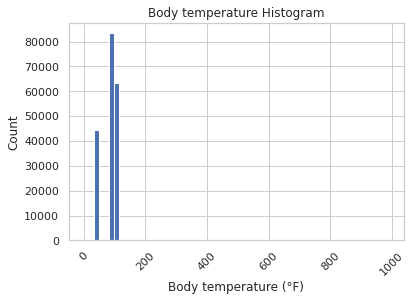

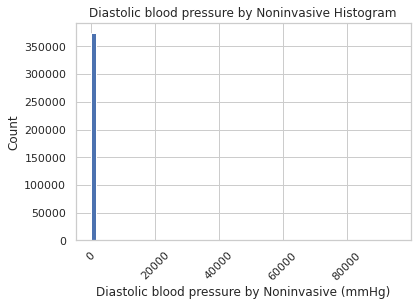

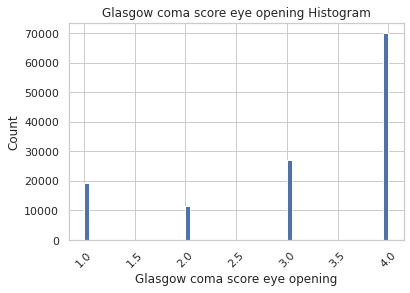

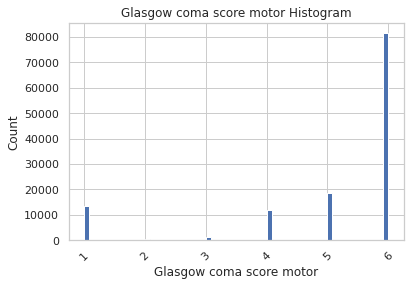

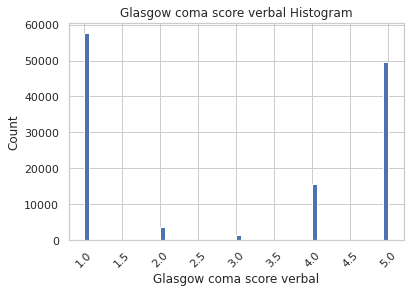

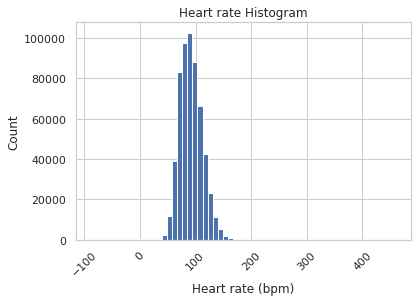

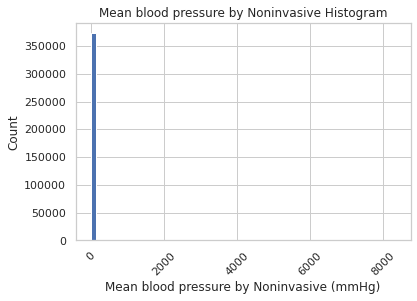

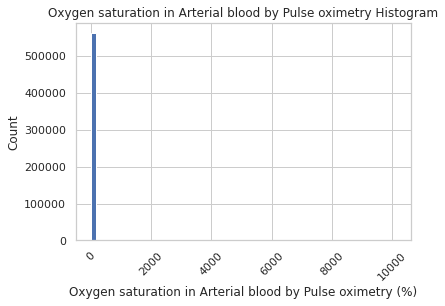

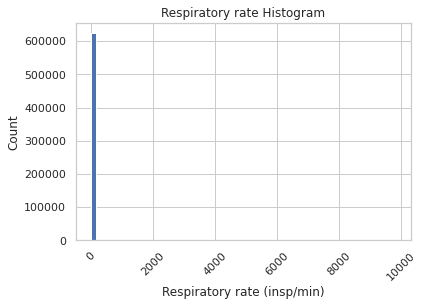

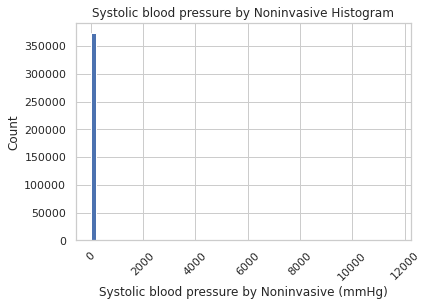

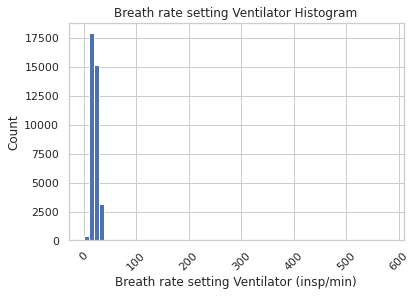

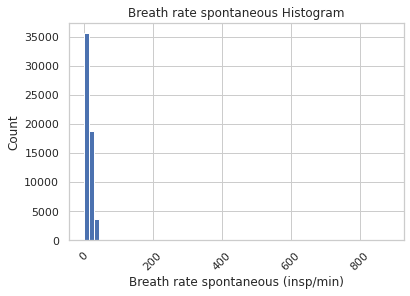

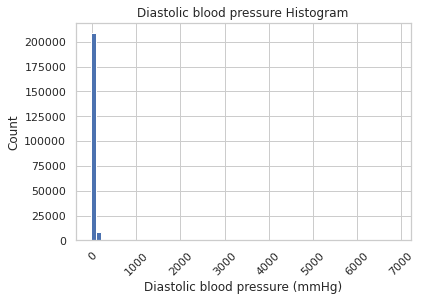

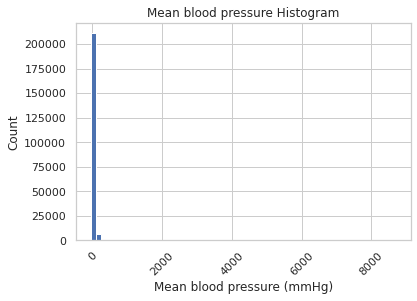

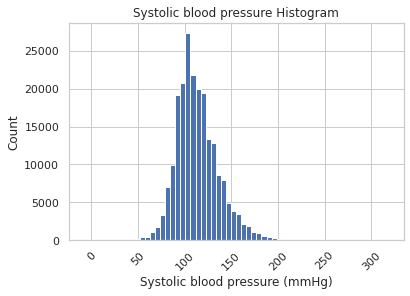

In [14]:
vitalsNames = vitalsDf.concept_name.unique()

for v in vitalsNames:

    fig, ax = plt.subplots()
    plt.xticks(rotation = 45)
    plt.hist(vitalsDf[vitalsDf.concept_name == v].value_as_number, bins=60)

    unit = vitalsDf[vitalsDf.concept_name == v].unit_source_value.tolist()[0]
    unit = (' (' + unit + ')') if unit else ''
    ax.set_title(v + ' Histogram')
    ax.set_xlabel(v + unit)
    ax.set_ylabel('Count')

## Laboratory Measurements

In [15]:
labsQuery = """select * from sepsis_micro.lab_measurements;"""
labsDf = pd.read_sql_query(labsQuery, con)
labsDf

,micro_specimen_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,9734522,-2144679073,2194-04-08 22:48:00,mEq/L,13.0,Bicarbonate [Moles/volume] in Serum or Plasma,1
1,1247618,-2144679073,2194-04-08 22:48:00,mEq/L,13.0,Bicarbonate [Moles/volume] in Serum or Plasma,2
2,9734522,-2144679073,2194-04-09 11:05:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,3
3,1247618,-2144679073,2194-04-09 11:05:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,4
4,1247618,-2144679073,2194-04-10 04:13:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,5
...,...,...,...,...,...,...,...
378858,8863285,2146653386,2149-03-13 04:31:00,g/dl,13.3,Hemoglobin [Mass/volume] in Blood,2
378859,8863285,2146653386,2149-03-13 01:32:00,mEq/L,4.1,Potassium [Moles/volume] in Serum or Plasma,1
378860,8863285,2146653386,2149-03-13 04:31:00,mEq/L,3.8,Potassium [Moles/volume] in Serum or Plasma,2
378861,8863285,2146653386,2149-03-13 01:32:00,mEq/L,137.0,Sodium [Moles/volume] in Serum or Plasma,1


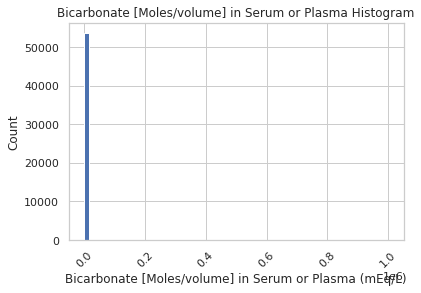

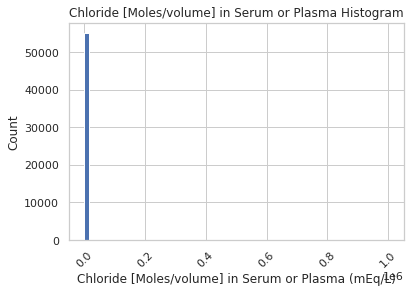

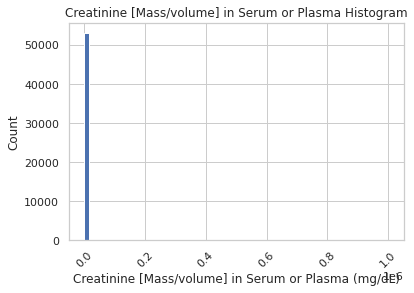

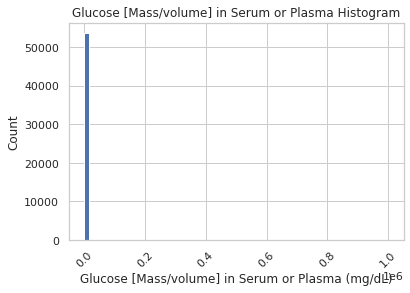

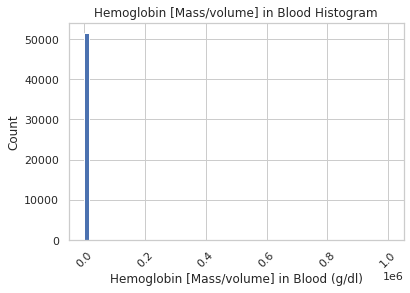

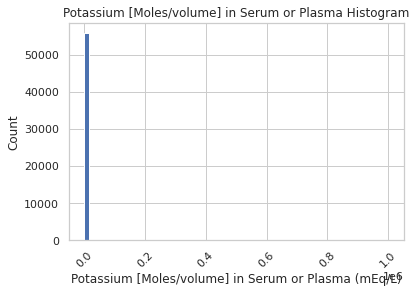

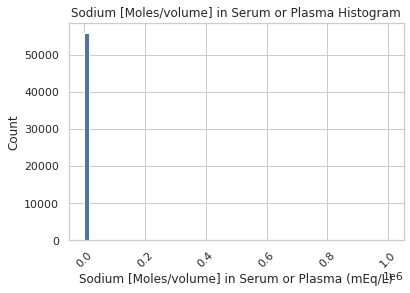

In [16]:
labsNames = labsDf.concept_name.unique()

for v in labsNames:

    fig, ax = plt.subplots()
    plt.xticks(rotation = 45)
    plt.hist(labsDf[labsDf.concept_name == v].value_as_number, bins=60)

    unit = labsDf[labsDf.concept_name == v].unit_source_value.tolist()[0]
    unit = (' (' + unit + ')') if unit else ''
    ax.set_title(v + ' Histogram')
    ax.set_xlabel(v + unit)
    ax.set_ylabel('Count')

## Mortality Data

In [17]:
mortalityQuery = """select * from sepsis_micro.mortality;"""
mortalityDf = pd.read_sql_query(mortalityQuery, con)
mortalityDf

,micro_specimen_id,person_id,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality
0,6365708,-327798482,False,False,False,False,False,False,False
1,9739471,-547630419,False,False,False,False,False,False,False
2,1165358,53482570,False,False,False,False,False,False,False
3,9769904,-1046091425,False,False,False,False,False,False,False
4,1757513,697543230,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25779,9590030,-1745758358,False,False,False,False,False,False,False
25780,1337571,-125994228,False,False,False,False,False,False,False
25781,5635481,-1722273729,True,True,True,True,True,True,True
25782,3230273,809235921,False,False,False,False,False,False,False


In [18]:
mortalityData = []
mortalityData.append(['Seven Day Mortality', mortalityDf.seven_day_mortality.sum()])
mortalityData.append(['Fourteen Day Mortality', mortalityDf.fourteen_day_mortality.sum()])
mortalityData.append(['Twentyone Day Mortality', mortalityDf.twentyone_day_mortality.sum()])
mortalityData.append(['Twentyeight Day Mortality', mortalityDf.twentyeight_day_mortality.sum()])
mortalityData.append(['Sixty Day Mortality', mortalityDf.sixty_day_mortality.sum()])
mortalityData.append(['Ninety Day Mortality', mortalityDf.ninety_day_mortality.sum()])
mortalityData.append(['Onetwenty Day Mortality', mortalityDf.onetwenty_day_mortality.sum()])

In [19]:
plotDf = pd.DataFrame(mortalityData, columns=["mortality_class", "cnt"])
plotDf

,mortality_class,cnt
0,Seven Day Mortality,1780
1,Fourteen Day Mortality,2571
2,Twentyone Day Mortality,2979
3,Twentyeight Day Mortality,3248
4,Sixty Day Mortality,3780
5,Ninety Day Mortality,4017
6,Onetwenty Day Mortality,4179


Text(0.5, 0, 'Mortality Class')

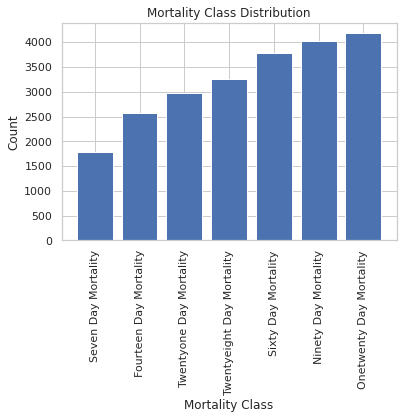

In [20]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=plotDf.mortality_class, height=plotDf.cnt)

ax.set_title('Mortality Class Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Mortality Class')